- "Advertising is the art of convincing people to spend money they don't have for something they don't need."

- ***But how effective is advertising, really?***

- In this notebook, we analyze a dataset that examines the relationship between advertising budgets across various media platforms and their impact on - sales figures. By exploring this data, we aim to uncover patterns and insights that showcase the true power—or limitations—of advertising.

- If you find this notebook insightful, don't forget to give it an upvote!

### Importing Libraries and Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

***Read the dataset***

In [3]:
df=pd.read_csv(open("Advertising.csv"))
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


***Exploratory Data Analysis (EDA)***

- In this section, we dive deeper into the dataset to understand its structure and uncover relationships between different variables.

- By examining the data, we aim to identify trends, patterns, and potential insights that can inform further analysis.

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


***Inspecting Dataset Columns***

In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.size

800

***Data Types of Columns***

In [7]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

***Summary Statistics of the Dataset***

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# Checking Null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

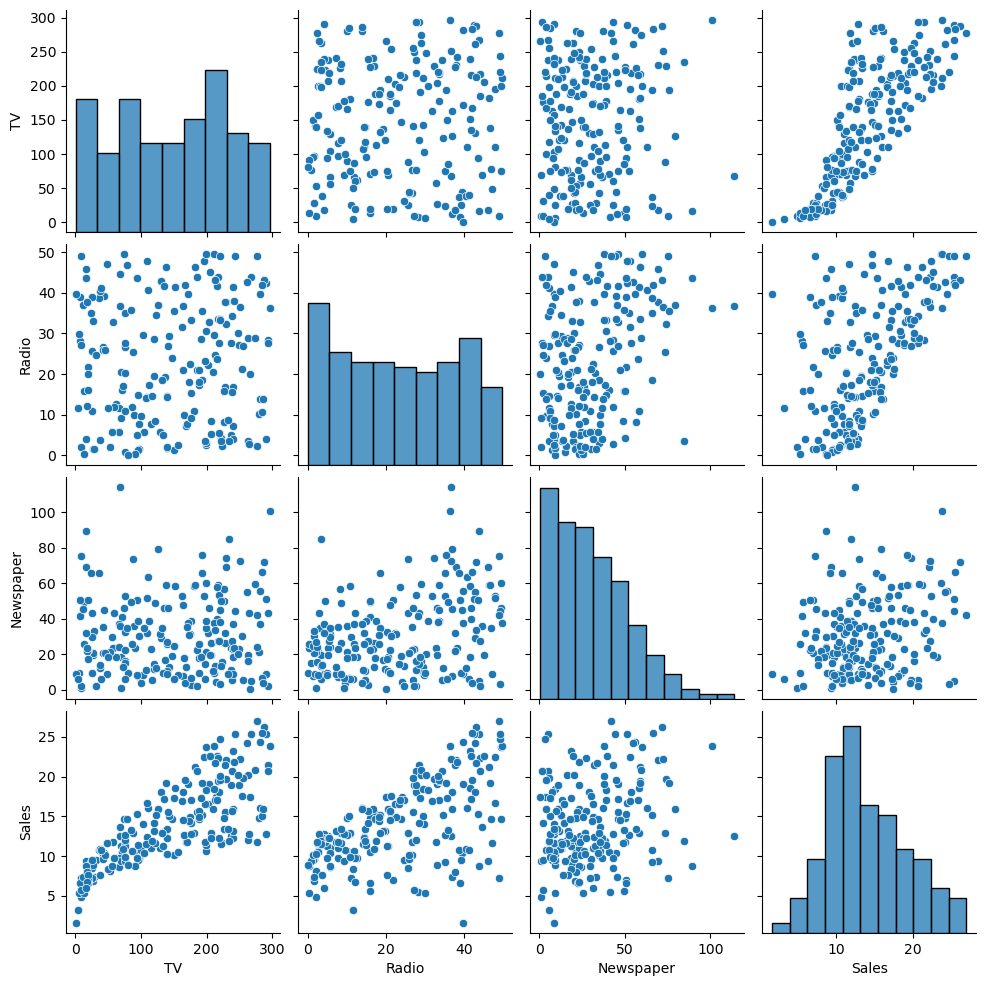

In [10]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

***Visualizing Distributions and Outliers***

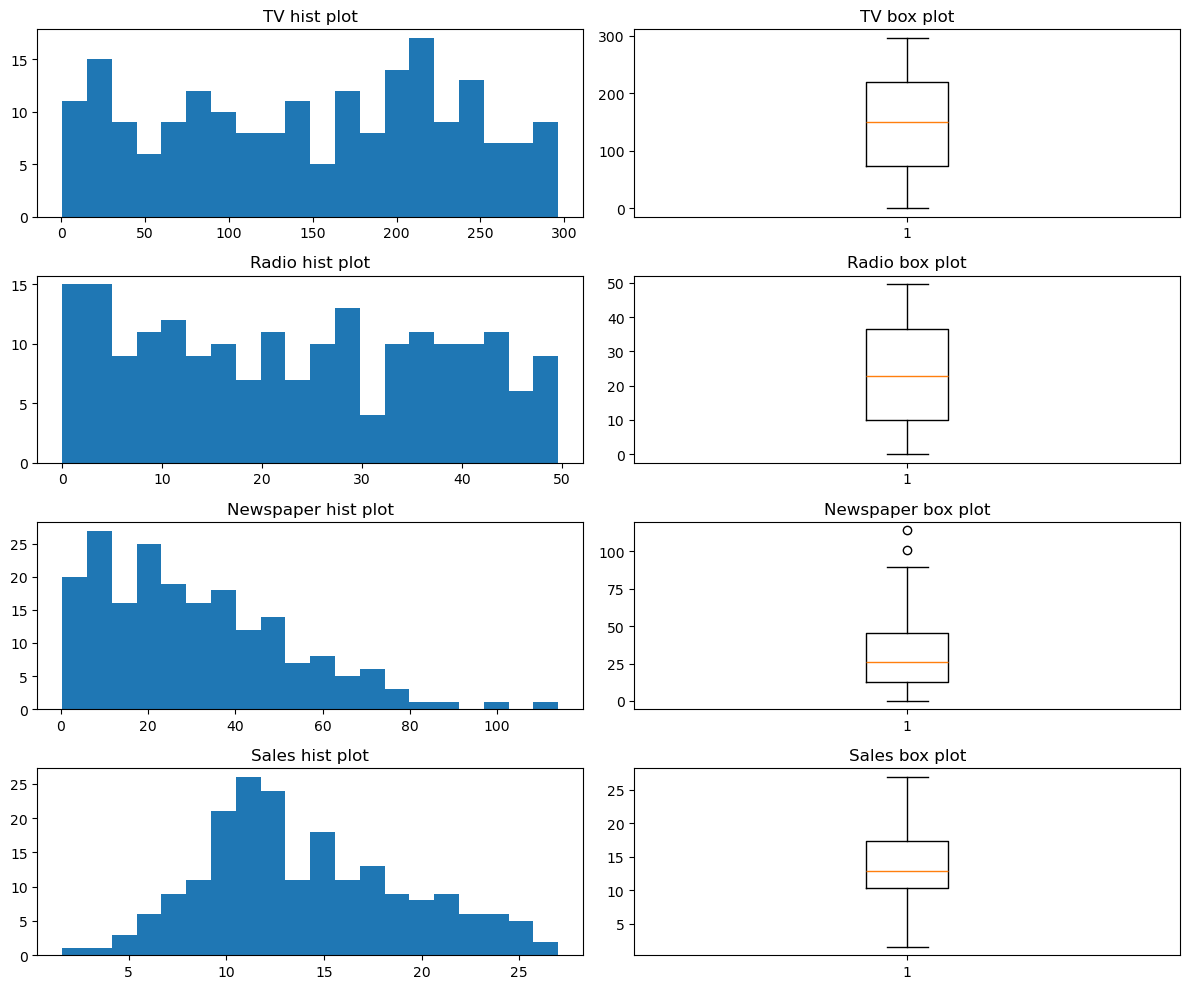

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 2, 1)
plt.hist(df['TV'], bins=20)
plt.title("TV hist plot")

plt.subplot(4, 2, 2)
plt.boxplot(df['TV'])
plt.title("TV box plot")

plt.subplot(4, 2, 3)
plt.hist(df['Radio'], bins=20)
plt.title("Radio hist plot")

plt.subplot(4, 2, 4)
plt.boxplot(df['Radio'])
plt.title("Radio box plot")

plt.subplot(4, 2, 5)
plt.hist(df['Newspaper'], bins=20)
plt.title("Newspaper hist plot")

plt.subplot(4, 2, 6)
plt.boxplot(df['Newspaper'])
plt.title("Newspaper box plot")

plt.subplot(4, 2, 7)
plt.hist(df['Sales'], bins=20)
plt.title("Sales hist plot")

plt.subplot(4, 2, 8)  # Corrected subplot position
plt.boxplot(df['Sales'])
plt.title("Sales box plot")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Outlier analysis

In [12]:
#step-1 : calculate q1 and q3
for i in df:
    q1=np.quantile(df[i],0.25)
    q3=np.quantile(df[i],0.75)
    
    #step-2:calcule IQR=q3-q1
    IQR=q3-q1
    
    #step-3:lb=q1-1.5*IQR
    lb=q1-1.5*IQR
    
    #step-4:ub=q3+1.5*IQR
    ub=q3+1.5*IQR
    
    #step-5:con1=data<lb
    con1=df[i]<lb
    
    #step-6:con2=data>ub
    con2=df[i]>ub
    
    #step-7:con3=con1<or(|)>con2
    con3=con1 | con2
    
    #step-8:data[con3]
    count=len(df[con3]) #427
    print(f"outlier data {i} is {count}")

outlier data TV is 0
outlier data Radio is 0
outlier data Newspaper is 2
outlier data Sales is 0


#### Correlation Analysis¶

- Let's compute the correlation matrix to quantify the relationships between the variables.

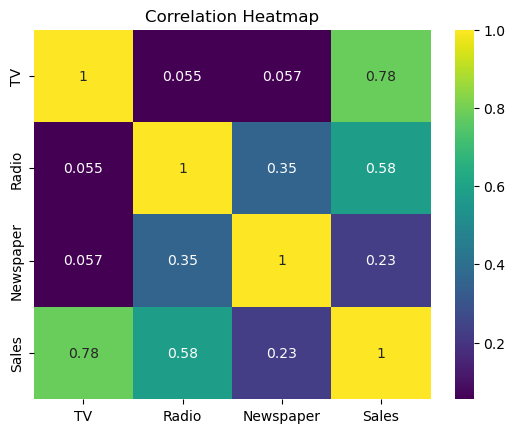

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

### Calculating Variance Inflation Factor (VIF)

In this step, the code calculates the Variance Inflation Factor (VIF) for each feature in the dataset (except the target variable 'Sales'). The VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity with other features. Here's a breakdown of the process:

- ***Dropping the Target Variable***: The target variable 'Sales' is dropped from X to focus on the predictor features.

- ***Calculating VIF***: The VIF is calculated for each feature using variance_inflation_factor, which measures the collinearity of each feature with the others.

- ***Storing Results***: The feature names and their corresponding VIF values are stored in a new DataFrame data.

In [14]:
X=df.drop('Sales',axis=1)
data=pd.DataFrame()
data['features']=X.columns
data['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
data

,features,vif
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


***Scaling the Features***

In [15]:
ss=StandardScaler()
scaled_data=ss.fit_transform(df.drop('Sales',axis=1))
scaled_data

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [16]:
#Creating a Scaled DataFrame
scaled_df=pd.DataFrame()
scaled_df[X.columns]=scaled_data
scaled_df['Sales']=df['Sales']
scaled_df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,9.3
3,0.052050,1.217855,1.286405,18.5
4,0.394182,-0.841614,1.281802,12.9


### Building a Predictive Model

Based on the observed correlations, it appears feasible to predict sales using advertising budgets. In this section, we will construct a linear regression model to evaluate how well we can predict sales figures and understand the impact of different advertising channels.

In [17]:
# Define features and target variable
X=scaled_df.drop('Sales',axis=1)
y=scaled_df['Sales']

In [18]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((160, 3), (160,), (40, 3), (40,))

In [19]:
# Initialize and train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
# Make predictions
y_pred=model.predict(X_test)

***Evaluating Model Performance***

This heading effectively highlights the focus on assessing the model's accuracy and goodness of fit using metrics like Mean Squared Error (MSE) and R-squared (R²).

In [21]:
# Calculate prediction accuracy
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MSE is:{mse}")
print(f"r2_r2_score is:{r2}")

MSE is:3.1740973539761037
r2_r2_score is:0.899438024100912


In [22]:
import pickle

# Save the trained model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# To load the model later:
# with open('linear_regression_model.pkl', 'rb') as f:
#     model = pickle.load(f)


In [23]:
with open('linear_regression_model.pkl', 'rb') as f:
        model = pickle.load(f)

In [25]:
tv = float(input("Enter TV advertising budget: "))
radio = float(input("Enter Radio advertising budget: "))
newspaper = float(input("Enter Newspaper advertising budget: "))
input_data = np.array([[tv, radio, newspaper]])
predicted_sales = model.predict(input_data)

    # Output the predicted sales
print(f"Predicted Sales: {predicted_sales[0]}")

Enter TV advertising budget:  500
Enter Radio advertising budget:  450.69
Enter Newspaper advertising budget:  54.12365


Predicted Sales: 3195.3850706745875


2025-01-10 20:20:01.799 
  command:

    streamlit run C:\Users\anand\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
